In [59]:
import os
import pandas as pd
import xlrd
import re
import matplotlib.pyplot as plt

In [5]:
!ls

SDR_Monthly_Call_Activity.xlsx SDR_Monthly_Meeting.xlsx
SDR_Monthly_Emails.xlsx        Untitled.ipynb


In [7]:
cur_dir = os.getcwd()

In [21]:
xl = pd.ExcelFile('SDR_Monthly_Call_Activity.xlsx')

In [22]:
xl.sheet_names

[u'Calls Placed Per Month', u'Completed Calls Per Month', u'Data']

In [23]:
dfs = {sheet: xl.parse(sheet) for sheet in xl.sheet_names}

In [25]:
call_dat = dfs['Data']

In [31]:
call_dat.columns = [re.sub(r'\W+', '', c) for c in call_dat.columns]

In [32]:
call_dat.columns

Index([u'Subject', u'Date', u'Priority', u'Status', u'Task', u'CompanyAccount',
       u'Contact', u'Lead', u'Opportunity', u'CreatedDate', u'Assigned',
       u'Outcome', u'Month'],
      dtype='object')

In [34]:
call_dat.Assigned.value_counts()

Matt Tager            4105
Jonelle Miller        3404
Ben Brendle           3381
Trevor Gori           3033
Diane Vu              2429
Phil Arbeiter         2116
Tony Fitzgerald       2084
David Iparraguirre    2073
Dan O'Brien           1828
Name: Assigned, dtype: int64

In [37]:
call_dat.Date = call_dat.Date.map(lambda x: pd.to_datetime(x))

In [45]:
call_dat['qt'] = pd.PeriodIndex(call_dat.Date, freq = 'Q-SEP')
# call_dat.Date.map(lambda x: x.month)

In [46]:
call_dat.groupby('qt').Assigned.value_counts()

qt      Assigned          
2016Q4  Trevor Gori            657
        Matt Tager             655
        Phil Arbeiter          647
        Jonelle Miller         612
        Dan O'Brien            576
        David Iparraguirre     573
        Ben Brendle            502
        Tony Fitzgerald        480
        Diane Vu               439
2017Q1  Matt Tager            1852
        Ben Brendle           1808
        Jonelle Miller        1558
        Diane Vu              1483
        Phil Arbeiter         1469
        Trevor Gori           1274
        Dan O'Brien           1249
        Tony Fitzgerald       1086
        David Iparraguirre    1023
2017Q2  Matt Tager            1596
        Jonelle Miller        1223
        Trevor Gori           1102
        Ben Brendle           1071
        Tony Fitzgerald        518
        Diane Vu               507
        David Iparraguirre     476
        Dan O'Brien              2
2017Q3  Jonelle Miller           4
        Matt Tager          

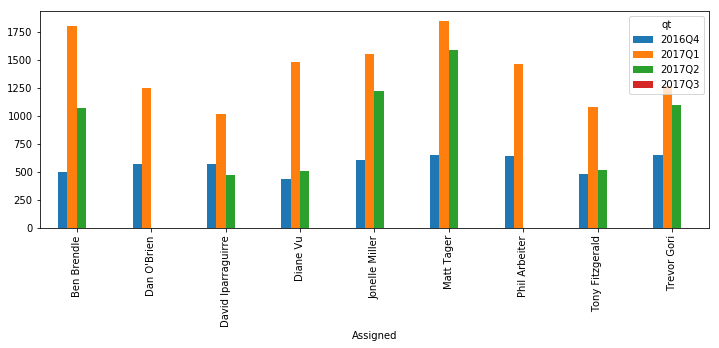

In [70]:
call_dat.groupby(['Assigned']).qt.value_counts().unstack().plot(subplots  = False, kind = 'bar', figsize = (12,4))
plt.show()

In [74]:
call_dat.groupby(['Date']).Assigned.value_counts().unstack().plot(kind = 'bar', subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113aac0d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113809850>], dtype=object)

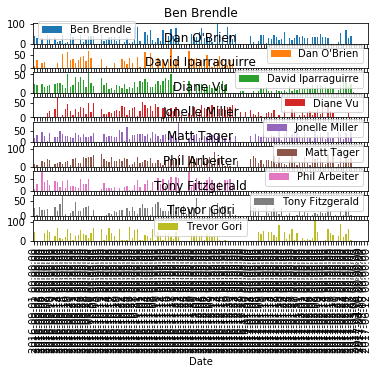

In [75]:
plt.show()